# CS-472 Computer Vision
## Assignment 05: Particle Swarm Optimization Tracking
## By: <span style="color:orange">Ioannis Kaziales</span> ~ csdp1305
### Spring semester 2022-2023 (Due Date: 03/07/2023)

This file contains the implementation for **part A** (using PSO to track a white circle in black background).
It utilizes some useful classes and functions from file `utils.py`.

If you want to see a visualization first, you can check the file `partA_demo.ipynb`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import random
from tqdm import tqdm

from utils import *

np.random.seed(42)

In [2]:
# ~~~~~~~~~~~~~~~~~~ Some parameters about the dataset ~~~~~~~~~~~~~~~~~~
SAVE_IMGS: bool = False         # whether to save images to disk. It will be slower if True
SAVE_TXTS: bool = True          # whether to save the estimated parameters to txt files

in_dir  = "askisi5_dataset1"    # input directory
txt_dir = "results/txt/partA"   # output directory to store the txt files with the estimated parameters
prefix  = "dataset"             # prefix of the input files
start_frame, end_frame = 0, 600

if not os.path.exists(txt_dir):
    os.makedirs(txt_dir)

if SAVE_IMGS:
    out_dir = "results/imgs/partA"      # output directory to store the images with the circles overlaid
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

### 1st frame: Find the Parameters with no prior knowledge

In [3]:
img = cv2.imread(os.path.join(in_dir, f"{prefix}{start_frame}.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
y_max, x_max = img.shape[:2]
max_radius = min(x_max, y_max) / 2

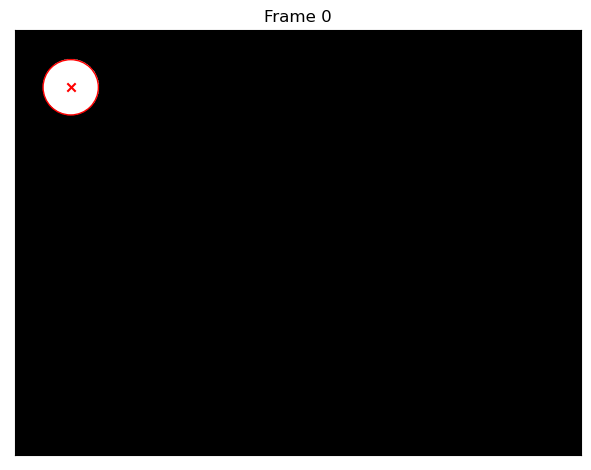

In [4]:
# PSO parameters for the first frame
num_particles = 20
max_iterations = 100
stop_iterations = 10    # stop if no improvement after 15 iterations
c1 = 2.0                # cognitive parameter
c2 = 2.0                # social parameter
w  = 0.7                # inertia weight
decay = 1.0             # decay of inertia

particles = initialize_particles(img, num_particles, [x_max, y_max, max_radius])
optim = ParticleSwarmOptimizer(num_particles, max_iterations, c1, c2, w, decay, stop_iterations)
best_position, best_fitness, _ = optim.optimize(img, particles, [x_max, y_max, max_radius])

if SAVE_TXTS:
    save_txt(os.path.join(txt_dir, f"{prefix}{start_frame}.txt"), estimated_params=best_position, type='circle')

# show the estimated circle
filename = os.path.join(out_dir, f"{prefix}_{0}.png") if SAVE_IMGS else None
plot_estimation(img, best_position, title=f"Frame {0}", save_filename=filename, est_type='circle')

start_frame += 1

### Next Frames: Use the estimated parameters from the previous frame as prior knowledge

In [5]:
num_particles = 20
max_iterations = 100
stop_iterations = 10     # stop if no improvement after these iterations
c1 = 0.4                # cognitive parameter
c2 = 1.0                # social parameter
w  = 0.7                # inertia weight
decay = 0.97            # decay of inertia

for i in tqdm(range(start_frame, end_frame)):
    w  = 0.7
    img = cv2.imread(os.path.join(in_dir, f"{prefix}{i}.png"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    y_max, x_max = img.shape[:2]
    max_radius = min(x_max, y_max) / 2

    particles = initialize_particles(img, num_particles, [x_max, y_max, max_radius])
    init_fitness = evaluate_fitness(img, best_position)
    optim = ParticleSwarmOptimizer(num_particles, max_iterations, c1, c2, w, decay, stop_iterations, best_position, init_fitness)
    best_position, best_fitness, _ = optim.optimize(img, particles, [x_max, y_max, max_radius])

    # save the estimated circle parameters and/or the preprocessed image
    if SAVE_TXTS:
        save_txt(os.path.join(txt_dir, f"{prefix}{i}.txt"), estimated_params=best_position, type='circle')
    if SAVE_IMGS:
        filename = os.path.join(out_dir, f"{prefix}_{0}.png")
        plot_estimation(img, best_position, title=f"Frame {i}", save_filename=filename, show=False, est_type='circle')

100%|██████████| 599/599 [02:29<00:00,  4.01it/s]


In [6]:
# you can also make a video from the saved images if you saved them (but they need to be alone in the directory)
if SAVE_IMGS:
    make_video(out_dir, prefix, fps=30, width=1158, height=921)